<a href="https://colab.research.google.com/github/takatakamanbou/ML/blob/main/ex01noteA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML2022 ex01noteA

<img width=72 src="https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/ML-logo.png"> https://www-tlab.math.ryukoku.ac.jp/wiki/?ML/2022


----
## 機械学習とは
----

----
### 準備

Google Colab の Notebook では， Python というプログラミング言語のコードを動かして計算したりグラフを描いたりできます．
Python は，機械学習・人工知能やデータサイエンスの分野ではメジャーなプログラミング言語ですが，それを学ぶことはこの授業の守備範囲ではありません．以下の所々に現れるプログラムっぽい記述の内容は，理解できなくて構いません．

以下，コードセルを上から順に実行してながら読んでいってね．

In [6]:
# 準備あれこれ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
seaborn.set()

# データを読み込む
dfGori = pd.read_csv('https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/gorigori.csv', header=0)
xmin, xmax = -5, 40
ymin, ymax = 0, 130

----
### 機械学習とは (1)

**機械学習** とは，人間のように自ら知識を獲得し経験に基づいて動作を変えるような機械／コンピュータ／アルゴリズムの実現を目指す研究分野またはその技術を指します．
人間が行なっているような知的な情報処理の仕組みを人工的に実現することを目指す **人工知能** (**Artificial Intelligence**, **AI**)
の一分野です．
現在では，人間の知的情報処理をまねるだけでなく，データの中から何らかの知識や法則性を自動的に見つけ出したり，データに基づいて何らかの判断を自動的に下したりするような情報処理全般を対象とするものとなっています．



以下に，機械学習の応用の例をあげます．いずれも，データを入力するとそこから何らかの情報を出力する処理となっています．

**例1**: 画像に写った動物を分類する

- 入力: 様々な動物の写った画像
- 出力: ネコ，ペンギン，カピバラ，..., etc.

**例2**: 手書き数字の認識

- 入力: 手書き数字の画像
- 出力: 0, 1, 2, ..., 9 のいずれか

**例3**: 電力使用量の予測

- 入力: 時々刻々変化する気温，湿度，電力使用量の数値
- 出力: 1時間後の電力使用量の数値

**例4**: 顔画像からの年齢推定

- 入力: 顔画像
- 出力: 年齢を表す数値

**例5**: 通販サイト購買履歴からの顧客の買い物傾向の分類

- 入力: 様々な顧客の通販サイトの購買履歴
- 出力: 「グループ1」，「グループ2」，...，「グループK」のいずれか

これらはいずれも，「何らかのデータ $\boldsymbol{x}$ を入力すると適当な値 $\boldsymbol{y}$ を出力する」という処理となっています．
以下の左の図は，この処理を行う仕組みを $f$ という記号で表したものです．右の方は，$f$ を関数として数式で表現したものです．

$$
\boldsymbol{y} \longleftarrow \fbox{$f$} \longleftarrow \boldsymbol{x} \qquad\qquad\qquad\qquad \boldsymbol{y} = f(\boldsymbol{x})
$$

機械学習とは何かを理解するため，以下ではこの仕組み $f$ が簡単な数式で表現できるような例を考えます．

----
### ゴリゴリ君 ― 気温からアイス売上数を予測する ―


「気温」と「アイス売上数」の数値を集めた以下のようなデータを考えます（次のセルを実行してね）．

In [5]:
dfGori

,気温,アイス売上数
0,5.56,8
1,10.62,38
2,9.19,42
3,24.37,74
4,8.26,12
5,13.67,57
6,33.84,104
7,17.42,36
8,21.63,64
9,30.71,79


「気温」の単位は[度]（摂氏），アイス売上数の単位は[個]です．このようなデータを用いて「気温」から「アイス売上数」を予測する仕組みを作ることを考えてみましょう．

$$
\begin{aligned}
(アイス売上数) \longleftarrow \fbox{$f$} \longleftarrow (気温) 
\end{aligned}
$$

気温を $x$ [度]，アイス売上数を $y$ [個] として，この仕組みを次のような式で表してみます．

$$
\begin{aligned}
y = f(x) = ax+b
\end{aligned}
$$

この式には $a, b$ という二つの **変数** （**パラメータ**）があります．
これらを決めると，適当な気温の値 $x$ を入力して，アイス売上数（の予測値）$y$ を出力させることができます．
パラメータ $a, b$ の値を変えると，同じ $x$ の値でも得られる $y$ の値は変化します．

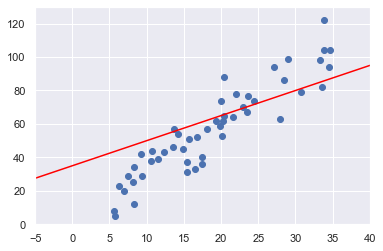

気温 10 度のときのアイス売上数の予測値は 50.0 個
気温 20 度のときのアイス売上数の予測値は 65.0 個
気温 30 度のときのアイス売上数の予測値は 80.0 個


In [10]:
#@title a, b の値を適当に変えてこのセルを何度か実行し直してみよう
a =  1.5#@param　{type:"number"}
b = 35 #@param　{type:"number"}

X = dfGori['気温']
Y = dfGori['アイス売上数']

Xr = np.array([xmin, xmax])
Yest = a * Xr + b

fig, ax = plt.subplots(1, facecolor='white', figsize=(6, 4))
ax.scatter(X, Y)
ax.plot(Xr, Yest, color='red')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 130)
plt.show()

for x in [10, 20, 30]:
    y = a*x+b
    print(f'気温 {x} 度のときのアイス売上数の予測値は {y:.1f} 個')

このように，パラメータの値を変化させるとそれに応じて出力（アイス売上数の予測値）も変化し，予測が良くなったり悪くなったりします．
ここではパラメータの値を手動で変えてみていますが，良い予測ができるようなパラメータを自動で決められるとうれしいですね．


----
### 機械学習とは (2)

機械学習では，「何らかのデータ $\bm{x}$ を入力すると適当な値 $\bm{y}$ を出力する」仕組みとして，上記の説明のように調節可能な **変数** （**パラメータ**）を持ったものを考えます．
そして，入力に対して「望ましい出力」が得られるようにパラメータを調節することを考えます．
このとき，機械学習は，「入力に対して「望ましい出力」が得られるように，データからパラメータを自動的に決定する」方法に関する分野/技術と言うことができます．

機械学習において，望ましい出力が得られるようにパラメータを調節する過程を学習といい，その際に用いるデータを学習データといいます．